In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import scipy.optimize as sco

In [2]:
def get_tickers():
    #num = None
    url_valid = False
    
    while url_valid is False:
        url_1 = input("Please submit an xslx or csv file to the ETF holdings: ")
        url_2 = input("Please submit an xslx or csv file to the ETF holdings: ")
        
        if "csv" or "xlsx" in url_1:
            pass
        
        if "xlsx" or "csv" in url_2:
            url_valid = True
            
        else:
            print("This is not a valid xslx or csv file")
            
    
    if ("ssga" and "xlsx" in url_1):
        num = 4
        tick = list(pd.read_excel(url_1, header=num).Ticker.dropna())
        
    else:
        num = 9
        tick = list(pd.read_csv(url_1, header=num).Ticker.dropna())
       
    
    if ("black_rock" and "csv" in url_2): 
        num_2 = 9
        ticker= list(pd.read_csv(url_2, header=num_2).Ticker.dropna())
        
    else:
        num_2 = 4
        ticker = list(pd.read_excel(url_2, header=num_2).Ticker.dropna())
        
        
    tick_data = list(set(tick) & set(ticker))
        
    return tick_data

In [4]:
tickers = get_tickers()

Please submit an xslx or csv file to the ETF holdings:  https://www.blackrock.com/us/individual/products/239726/ishares-core-sp-500-etf/1464253357814.ajax?fileType=csv&fileName=IVV_holdings&dataType=fund
Please submit an xslx or csv file to the ETF holdings:  https://www.ssga.com/us/en/individual/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx


In [5]:
data = yf.download(tickers, period="10y").dropna(axis=0, how="all")

[*********************100%***********************]  503 of 503 completed


In [6]:
data.head(10)

Adj Close                                                  \
                    A       AAL        AAP       AAPL ABBV        ABC   
Date                                                                    
2011-12-28  22.298836  4.892829  67.546944  12.328910  NaN  31.392679   
2011-12-29  22.919880  4.930538  67.633423  12.404848  NaN  31.818874   
2011-12-30  22.834890  4.779699  66.941269  12.401175  NaN  31.699539   
2012-01-03  23.848188  4.826835  66.431694  12.591937  NaN  32.449612   
2012-01-04  23.658596  4.741990  67.989159  12.659608  NaN  32.560421   
2012-01-05  24.188128  5.156795  68.421799  12.800154  NaN  32.807610   
2012-01-06  24.449615  5.279353  68.739021  12.933964  NaN  32.892849   
2012-01-09  25.090271  5.392483  68.719810  12.913451  NaN  32.875801   
2012-01-10  25.560968  5.392483  68.777496  12.959687  NaN  33.250839   
2012-01-11  25.443293  5.571601  69.238945  12.938559  NaN  32.909893   

                                                        ...     Volume  \
                 ABMD        ABT        ACN       ADBE  ...        XEL   
Date                                                    ...              
2011-12-28  18.250000  21.824492  43.646183  28.020000  ...  1956600.0   
2011-12-29  18.379999  22.019943  44.455360  28.309999  ...  1590200.0   
2011-12-30  18.469999  21.980860  43.951679  28.270000  ...  1904900.0   
2012-01-03  18.250000  22.172401  43.720501  28.570000  ...  3734100.0   
2012-01-04  18.110001  22.086399  43.703987  28.280001  ...  1919000.0   
2012-01-05  18.270000  22.035587  42.870026  28.480000  ...  2125100.0   
2012-01-06  18.139999  21.836222  42.795719  28.719999  ...  1454500.0   
2012-01-09  18.209999  21.832314  42.721409  28.530001  ...  1396800.0   
2012-01-10  18.160000  21.933945  43.456284  29.200001  ...  2602500.0   
2012-01-11  18.240000  21.851147  44.315006  29.320000  ...  2688300.0   

                                                                               \
                 XLNX         XOM       XRAY        XYL        YUM        ZBH   
Date                                                                            
2011-12-28  2108800.0  12767500.0   499200.0   917700.0  2511729.0  2361400.0   
2011-12-29  1295500.0  10865900.0   514400.0  3975200.0  2412272.0  1101000.0   
2011-12-30  1328900.0   9768900.0   568800.0  1169700.0  1733464.0  1106900.0   
2012-01-03  2374400.0  20906800.0   955000.0  1059100.0  4735660.0  1958100.0   
2012-01-04  2501300.0  16130900.0   561400.0  1391900.0  5013164.0  1755000.0   
2012-01-05  2691500.0  17452800.0   981600.0  2270700.0  5059623.0  2199000.0   
2012-01-06  2531500.0  15942100.0   720800.0   524400.0  3761264.0  1643000.0   
2012-01-09  2610200.0  11664200.0   546700.0   558700.0  3684620.0  1711600.0   
2012-01-10  1863400.0  13080800.0  1102300.0  1048300.0  4825935.0  2765600.0   
2012-01-11  2476700.0  14831400.0   964600.0  1066300.0  8527386.0  1182400.0   

                                     
                ZBRA       ZION ZTS  
Date                                 
2011-12-28   72200.0  2236900.0 NaN  
2011-12-29   43100.0  1573200.0 NaN  
2011-12-30   98000.0  1108400.0 NaN  
2012-01-03  120900.0  3442600.0 NaN  
2012-01-04  252500.0  3478800.0 NaN  
2012-01-05  186500.0  4965600.0 NaN  
2012-01-06  194400.0  2994800.0 NaN  
2012-01-09  169400.0  2078900.0 NaN  
2012-01-10  105100.0  3420500.0 NaN  
2012-01-11   84500.0  3112600.0 NaN  

[10 rows x 3018 columns]

In [7]:
close = data["Adj Close"]
volume = data["Volume"]

In [8]:
class Momentum_Factors():
    
    def __init__(self, close, volume):
        self.tickers = tickers
        self.close = data["Adj Close"]
        self.price = data["Adj Close"]
        self.returns = data["Adj Close"].pct_change()
        self.volume = data["Volume"]
    
    
    def percent_above(self):
        """ Returns the percent above the 52 week low """
        self.roll_min = self.price.rolling(252).min()
        return ((self.price - self.roll_min) / self.roll_min)[-20:].mean()
    
    
    def price_oscillator(self):
        """ Returns the price oscillation """
        return ((self.price.rolling(20).mean() - self.price.rolling(260).mean())/
               self.price.rolling(260).std())[-20:].mean()
    
    
    def week_39_return(self):
        """ Returns: 39 Week Return """
        return self.price.pct_change(189)[-20:].mean()
    
    
    def trend(self):
        """ Returns the trend of the tickers """
        self.trend_df = pd.DataFrame(index=self.tickers)
        
        for i in range(1, 21):
            self.trend_df[i] = np.polyfit(range(len(self.price[-i - 252: -i])),
                                         self.price[-i - 252: -i], 1)[0]
        return self.trend_df.mean(axis=1)
    
    
    def price_volume(self):
        """ Returns volume price trend """
        return (self.returns * self.volume).rolling(252).sum()[-20:].mean()
    
    
    def merged_dataframe(self):
        """ Returns dataframe of the factors above """
        self.momentum_factor = pd.DataFrame(index=self.tickers)
        
        self.momentum_factor["Percent Above"] = self.percent_above()
        self.momentum_factor["Price Oscillator"] = self.price_oscillator()
        self.momentum_factor["39 Week Return"] = self.week_39_return()
        self.momentum_factor["Trend"] = self.trend()
        self.momentum_factor["Price Volume"] = self.price_volume()
        
        return (self.momentum_factor - self.momentum_factor.mean())/ self.momentum_factor.std()
    
    
    def baskets(self):
        """ Returns monthly z-factor score """
        self.z_score = self.merged_dataframe().sum(axis=1)
        return self.z_score.nlargest(10).index, self.z_score.nsmallest(10).index

In [9]:
dates = pd.DataFrame(pd.date_range("2016-12-23",
                                   end=dt.datetime.today(),
                                   freq='M'))

dates.rename(columns={0:"dates"}, inplace=True)

In [10]:
dates.dates[0:10]

0   2016-12-31
1   2017-01-31
2   2017-02-28
3   2017-03-31
4   2017-04-30
5   2017-05-31
6   2017-06-30
7   2017-07-31
8   2017-08-31
9   2017-09-30
Name: dates, dtype: datetime64[ns]

In [11]:
data.index

DatetimeIndex(['2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03',
               '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-09',
               '2012-01-10', '2012-01-11',
               ...
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [12]:
#Creating an empty dataframe for our portfolio, long and short baskets

portfolio = pd.DataFrame(index=dates.dates, columns=tickers)
long_basket = pd.DataFrame(index=dates.dates, columns=tickers)
short_basket = pd.DataFrame(index=dates.dates, columns=tickers)

In [13]:
for date in dates.dates:
    factors = Momentum_Factors(close, volume)
    longs, shorts = factors.baskets()
    
    for long in longs:
        portfolio[long].iloc[portfolio.index == date] = '1'
        long_basket[long].iloc[long_basket.index == date] =  '1'
        
    for short in shorts:
        portfolio[short].iloc[portfolio.index == date] = '-1'
        short_basket[short].iloc[short_basket.index == date] = '-1'
        
        
portfolio.fillna('0', inplace=True)
long_basket.fillna('0', inplace=True)
short_basket.fillna('0', inplace=True)

In [14]:
#Assets to go long
longs

Index(['F', 'NVDA', 'TMO', 'AMD', 'DVN', 'APD', 'MRO', 'MRNA', 'CDAY', 'FTNT'], dtype='object')

In [15]:
#Assets to go short
shorts

Index(['VIAC', 'DISCA', 'T', 'PENN', 'ATVI', 'GPS', 'PYPL', 'LVS', 'TWTR',
       'V'],
      dtype='object')

In [18]:
#Monthly returns

monthly_returns = data["Adj Close"][:-20].pct_change().resample('m').sum()#.shift(-1))
monthly_returns.head(10)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-31,0.024143,-0.022886,-0.008954,0.005863,0.0,0.009826,0.012020,0.007181,0.007209,0.008937,...,0.006578,0.002862,0.006968,0.004131,0.005239,0.000606,0.004893,0.002284,0.012103,0.0
2012-01-31,0.200550,0.532724,0.097056,0.122491,0.0,0.048269,0.006227,-0.028726,0.075809,0.091865,...,-0.037429,0.114412,-0.011498,0.077163,0.012271,0.076056,0.130049,0.057119,0.040131,0.0
2012-02-29,0.029017,-0.112361,0.111747,0.174666,0.0,-0.036578,0.133070,0.044736,0.038444,0.061829,...,-0.003989,0.035826,0.038504,0.026206,0.004846,0.045751,0.000797,0.018325,0.125365,0.0
2012-03-31,0.025426,0.038049,0.038130,0.102731,0.0,0.060646,0.067179,0.080214,0.081551,0.045399,...,0.009790,-0.010848,0.003485,0.038392,0.072481,0.073007,0.060335,0.070178,0.130535,0.0
2012-04-30,-0.049620,0.319307,0.036741,-0.017492,0.0,-0.062144,0.096785,0.021547,0.019685,-0.020332,...,0.022614,0.001146,-0.003615,0.024497,0.006805,0.028358,-0.019620,-0.056946,-0.048187,0.0
2012-05-31,-0.032994,0.269202,-0.207789,-0.007320,0.0,-0.001650,-0.171092,-0.003506,-0.126587,-0.075680,...,0.035527,-0.120755,-0.085803,-0.102245,-0.089287,-0.030637,-0.034974,-0.145437,-0.065623,0.0
2012-06-30,-0.026804,0.029534,-0.062016,0.012594,0.0,0.063203,0.125882,0.043367,0.056484,0.045775,...,0.023695,0.053025,0.086949,0.025018,-0.003598,-0.082004,0.065412,0.028888,0.026275,0.0
2012-07-31,-0.021005,-0.141967,0.030814,0.047235,0.0,0.010225,-0.009500,0.036743,0.005343,-0.043537,...,0.031303,-0.032522,0.015709,-0.037631,-0.046083,0.014016,-0.086034,0.007235,-0.062525,0.0
2012-08-31,-0.024800,-0.058303,0.016299,0.091166,0.0,-0.025943,-0.000902,-0.011499,0.022209,0.015300,...,-0.048796,0.053300,0.012119,-0.000089,0.018183,-0.016464,0.048206,0.077971,0.058791,0.0


In [19]:
#Multiplying the portfolio, long_basket, short basket data frames with the monthly returns

portfolio_returns = pd.DataFrame((monthly_returns * portfolio.astype(int)).mean(axis=1)).dropna()
short_returns = pd.DataFrame((monthly_returns * short_basket.astype(int)).mean(axis=1)).dropna()
long_returns = pd.DataFrame((monthly_returns * long_basket.astype(int)).mean(axis=1)).dropna()

#Monthly return of etf
etf_returns = pd.DataFrame(monthly_returns[monthly_returns.index >= "2016-12-30"].mean(axis=1))


#Difference in monthly return of our portfolio to the etf
portfolio_diff = pd.DataFrame(portfolio_returns[0] - etf_returns[0]).dropna()
short_diff = pd.DataFrame(short_returns[0] - etf_returns[0]).dropna()
long_diff = pd.DataFrame(long_returns[0] - etf_returns[0]).dropna()

In [20]:
#Cumulative returns of portfolio, short and long basket

portfolio_returns['cumulative_return'] = np.exp(np.log1p(portfolio_returns).cumsum())
short_returns['cumulative_return'] = np.exp(np.log1p(short_returns).cumsum())
long_returns['cumulative_return'] = np.exp(np.log1p(long_returns).cumsum())

#cum return of etf
etf_returns['cumulative_return'] = np.exp(np.log1p(etf_returns.mean(axis=1)).cumsum())

In [25]:
#Outputs:

#Momentum Factors
factors.merged_dataframe()

,Percent Above,Price Oscillator,39 Week Return,Trend,Price Volume
OGN,NaN,NaN,NaN,0.027744,NaN
HRL,-0.908254,-1.382198,-0.805574,-0.411257,-0.092846
NVDA,4.440425,1.500055,5.143532,0.239979,5.575978
IP,-1.084019,-1.475834,-0.950314,-0.135912,-0.195752
PPG,-0.546313,-0.276813,-0.129991,-0.292125,-0.077468
...,...,...,...,...,...
YUM,-0.245618,0.362891,0.378953,-0.174031,-0.096547
FITB,0.991128,0.439576,0.051376,-0.636510,0.132136
VNO,-0.542444,-0.477843,-1.007707,1.193797,-0.076325
LYV,0.944304,1.215128,0.433192,-0.269806,0.107954


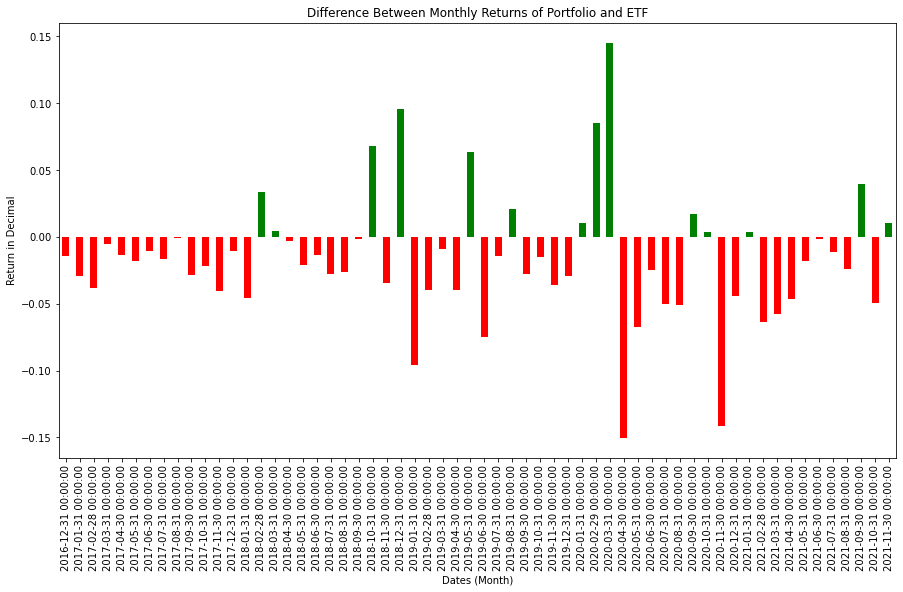

In [22]:
#Plotting returns of the trading algorithm

portfolio_diff['colors'] = (portfolio_diff[0] > 0)  #Colors for the postivie 
                                                #and negative values of return

portfolio_diff[0].plot(kind='bar'
                   , figsize=(15,8)
                   , title='Difference Between Monthly Returns of Portfolio and ETF'
                   , xlabel='Dates (Month)'
                   , ylabel='Return in Decimal'
                   , color=['green' if i == True else 'red' for i in portfolio_diff['colors']]);

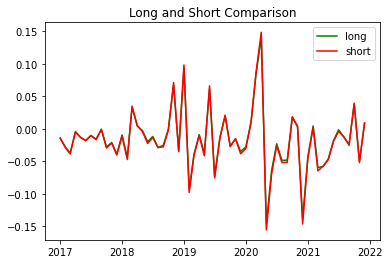

In [23]:
#Comparing the long and short assets and plotting their returns

plt.plot(long_diff,
        color="g",
        label="long")

plt.plot(short_diff,
        color="r",
        label="short")

plt.legend()
plt.title('Long and Short Comparison');

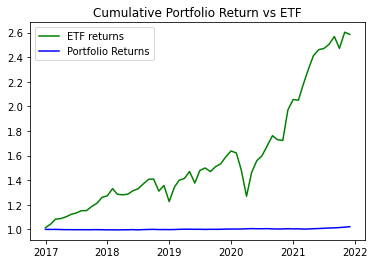

In [26]:
#Plotting the cumulative portfolio return vs the cumulative ETF return

plt.plot(etf_returns["cumulative_return"],
         label="ETF returns",
        color="g")

plt.plot(portfolio_returns["cumulative_return"],
         label="Portfolio Returns",
        color="b")

plt.legend()
plt.title('Cumulative Portfolio Return vs ETF');